#Thư viện

In [15]:
#import thư viện 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [2]:
!wget https://cs.uit.edu.vn/data2.txt
!wget https://cs.uit.edu.vn/data3.txt
!wget https://cs.uit.edu.vn/data4.txt

--2021-12-02 14:15:44--  https://cs.uit.edu.vn/data2.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142, 45.122.249.78
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203726 (1.1M) [text/plain]
Saving to: ‘data2.txt’

data2.txt           100%[===================>]   1.15M   967KB/s    in 1.2s    

2021-12-02 14:15:47 (967 KB/s) - ‘data2.txt’ saved [1203726/1203726]

--2021-12-02 14:15:47--  https://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142, 45.122.249.78
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt’

data3.txt           100%[===================>] 174.70K   242KB/s    in 0.7s    

2021-12-02 14:15:49 (242 KB/s) - ‘data3.txt’ saved [178891/178891]

--2021-12-02 14:15:49--  https://cs.uit.edu.vn/data4.txt
Resolving cs.u

#Đọc Dữ Liệu

In [3]:
#Đọc dữ liệu vào data_train và data_test
#data_train = np.loadtxt('/content/data2.txt', delimiter=',', dtype=float)
#data_test= np.loadtxt('/content/data3.txt', delimiter=',', dtype=float)
data_train = pd.read_csv('data2.txt', header=None)
data_test = pd.read_csv('data3.txt', header=None)
data_test2=pd.read_csv('data4.txt', header=None)

In [4]:
data_train =data_train.to_numpy()
data_test =data_test.to_numpy()

In [5]:
data_train= data_train[data_train[:,0]>0.4*1e7]
len(data_train)

42646

In [6]:
x_train = data_train[:, 0]  #cột đầu là X_train
y_train = data_train[:, 1]  #cột thứ hai là y_train
x_test= data_test[:,0]      #cột đầu là X_test
y_test=data_test[:,1]       #cột thứ hai là y_test

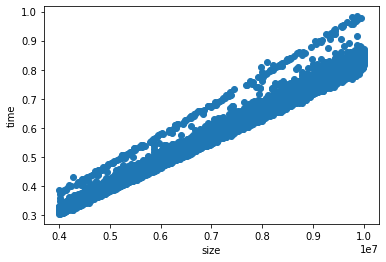

In [7]:
#vẽ data train
plt.scatter(x_train, y_train)
plt.xlabel("size")
plt.ylabel("time")
plt.show()

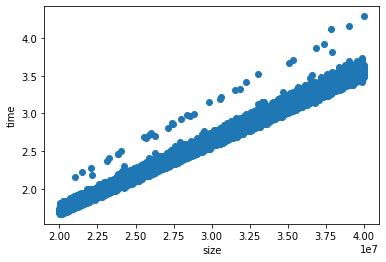

In [8]:
#vẽ data test 
plt.scatter(x_test, y_test)
plt.xlabel("size")
plt.ylabel("time")
plt.show()

#Hàm phụ

In [9]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1)

In [10]:
def plot_regression_line(x, y, b,title=""): 
    plt.scatter(x, y, color = "blue", 
               marker = "o", s = 30) 
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    # vẽ line
    plt.plot(x, y_pred, color = "red") 
    plt.title(title)
    plt.xlabel("size")
    plt.ylabel("time")
    plt.show()

#Train Model

In [11]:
reg=LinearRegression()
reg.fit(x_train.reshape(-1,1),y_train)
reg.score(x_train.reshape(-1,1),y_train)
y_trainpred=reg.predict(x_train.reshape(-1,1))
y_pred=reg.predict(x_test.reshape(-1,1))

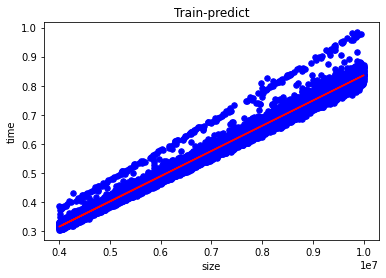

In [12]:
plot_regression_line(x_train,y_train,b = estimate_coef(x_train,y_trainpred),title="Train-predict")

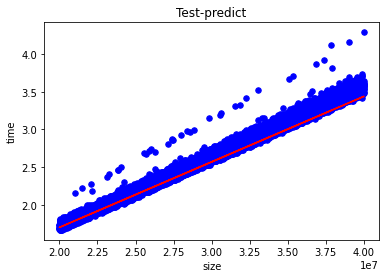

In [13]:
plot_regression_line(x_test,y_test,b = estimate_coef(x_test,y_pred ),title='Test-predict')

#Đánh giá

In [16]:
y_pred1=y_trainpred
print("Mean absolute: %f" % np.mean(np.absolute(y_pred1-y_train)))
print("R2-score: %f"% metrics.r2_score(y_train,y_pred1))
print("mean_squared_error %f" %mean_squared_error(y_pred1,y_train))

Mean absolute: 0.009515
R2-score: 0.991558
mean_squared_error 0.000190


In [17]:
y_pred=reg.predict(x_test.reshape(-1,1))
print("Mean absolute: %f" % np.mean(np.absolute(y_pred-y_test)))
print("MSE: %f"% np.mean((y_pred)-y_test)**2)
print("R2-score: %f"% metrics.r2_score(y_test,y_pred))
print("mean_squared_error %f" %mean_squared_error(y_pred,y_test))

Mean absolute: 0.075972
MSE: 0.005320
R2-score: 0.965618
mean_squared_error 0.009925


In [18]:
reg.score(x_test.reshape(-1,1),y_test)

0.9656180301457472

#LR use polynominalfeatures

In [19]:
def polynominalfeatures(x):
  return np.c_[x[:, :1], np.log(x[:, :1]), x[:, :1]**0.5]

In [20]:
train = pd.read_csv('data2.txt', header=None).to_numpy()
test1 = pd.read_csv('data3.txt', header=None).to_numpy()
test2 = pd.read_csv('data4.txt', header=None).to_numpy()

train = train[train[:, 0] > 0.4*1e7]

X_train = polynominalfeatures(train)
X_test1 = polynominalfeatures(test1)
X_test2 = polynominalfeatures(test2)

scaler = StandardScaler()

X_train, Y_train = scaler.fit_transform(X_train), train[:, 1]
X_test1, Y_test1 = scaler.transform(X_test1), test1[:, 1]
X_test2, Y_test2 = scaler.transform(X_test2), test2[:, 1]

In [21]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_trainpred=reg.predict(X_train)
Y_pred1=reg.predict(X_test1)
Y_pred2=reg.predict(X_test1)

In [22]:
Y_train.shape

(42646,)

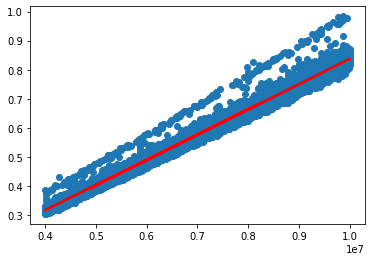

In [31]:
train_pred = reg.predict(X_train)
train_score = r2_score(Y_train, train_pred)
plt.scatter(scaler.inverse_transform(X_train)[:, 0], Y_train)
plt.plot(scaler.inverse_transform(X_train)[:, 0], train_pred, c='r')

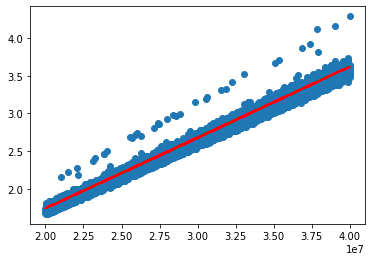

In [30]:
test_pred = reg.predict(X_test1)
test_score = r2_score(Y_test1, test_pred)
plt.scatter(scaler.inverse_transform(X_test1)[:, 0],Y_test1)
plt.plot(scaler.inverse_transform(X_test1)[:, 0], test_pred, c='r')

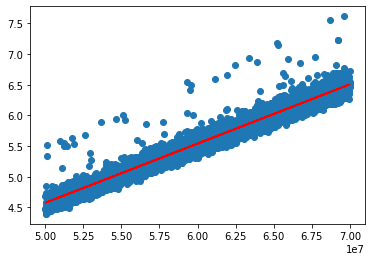

In [32]:
test_pred = reg.predict(X_test2)
test_score = r2_score(Y_test2, test_pred)
plt.scatter(scaler.inverse_transform(X_test2)[:, 0], Y_test2)
plt.plot(scaler.inverse_transform(X_test2)[:, 0], test_pred, c='r')

#Đánh giá

##Train

In [23]:
Y_pred=Y_trainpred
print("Mean absolute: %f" % np.mean(np.absolute(Y_pred-Y_train)))
print("R2-score: %f"% metrics.r2_score(Y_train,Y_pred))
print("mean_squared_error %f" %mean_squared_error(Y_pred,Y_train))

Mean absolute: 0.009480
R2-score: 0.991604
mean_squared_error 0.000189


##Test data3

In [24]:
Y_pred1=reg.predict(X_test1)
print("Mean absolute: %f" % np.mean(np.absolute(Y_pred1-Y_test1)))
print("MSE: %f"% np.mean((Y_pred1)-Y_test1)**2)
print("R2-score: %f"% metrics.r2_score(Y_test1,Y_pred1))
print("mean_squared_error %f" %mean_squared_error(Y_pred1,Y_test1))

Mean absolute: 0.053361
MSE: 0.001208
R2-score: 0.983874
mean_squared_error 0.004655


##Test data4

In [25]:
Y_pred2=reg.predict(X_test2)
print("Mean absolute: %f" % np.mean(np.absolute(Y_pred2-Y_test2)))
print("MSE: %f"% np.mean((Y_pred2)-Y_test2)**2)
print("R2-score: %f"% metrics.r2_score(Y_test2,Y_pred2))
print("mean_squared_error %f" %mean_squared_error(Y_pred2,Y_test2))

Mean absolute: 0.090157
MSE: 0.000902
R2-score: 0.953297
mean_squared_error 0.015252
